In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('Sales.csv')

In [ ]:
df.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148


In [ ]:
dfnew = df

In [ ]:
dfnew.drop(['Region'],axis=1)

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,Moderate,17354.77148
...,...,...,...,...,...,...,...,...,...
2995,557.098500,39.733056,25.511859,4.705654,1491.415606,1.314891,143.790388,Moderate,21332.40603
2996,667.120978,54.746729,30.626235,4.374541,1259.077673,0.429627,378.527732,High,26780.91894
2997,653.702072,43.975689,28.177723,4.240031,1689.196119,0.956180,251.927969,Moderate,21217.38795
2998,539.521178,30.624460,26.914985,4.423562,1103.443317,2.271826,320.796878,High,22094.55742


In [ ]:
popularity_mapping = {'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5}



In [ ]:
def replacePopularity(xval):
    if xval in popularity_mapping:
      return popularity_mapping[xval]
    else:
      return xval

In [ ]:
dfnew['Popularity'] = df['Popularity'].apply(replacePopularity)

In [ ]:
dfnew.drop(['Region'],axis=1,inplace=True)

In [ ]:
dfnew.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,4,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,5,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,5,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,5,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,3,17354.77148


In [ ]:
X = df[df.columns[:-1]].values
y= df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8 *len(df))])

# Build Linera Regression

In [ ]:
ln_model = LinearRegression()

In [ ]:
ind_vars1 = ['Advertising Expenditure']

In [ ]:
ln_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = ln_model.predict(X_test)

In [ ]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3653850.3169726157
R-squared: 0.7249913706415817


In [ ]:
# printing the linear regression coefficients
print(
    "Slope:", ln_model.coef_,
    "Intercept:", ln_model.intercept_,
)

Slope: [ 3.67870517e+01  2.07566273e+01 -7.52314776e+00  2.89941741e+03
 -8.66927472e+00 -4.44540380e+02 -6.99222306e-02  1.45072610e+02] Intercept: 530.8214809646379


In [ ]:
X_train.shape

(2400, 8)

In [ ]:
print(X_train[1,0])

596.527238


In [ ]:
print(X_train[:,0])

[628.7484657 596.527238  662.8929109 ... 669.3549478 778.1462834
 634.0828892]


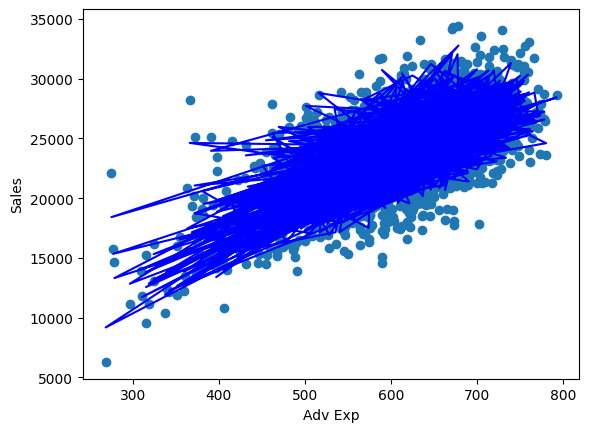

In [ ]:
# plotting the best-fit line
fitted_values1 = ln_model.predict(X_train)

# Plot the scatterplot and regression line
plt.scatter(X_train[:,0], y_train)
plt.plot(X_train[:,0], fitted_values1, color='blue')
plt.xlabel('Adv Exp')
plt.ylabel('Sales')
plt.show()